# Introduction to Text generation

explains how we can split a given corpus of data into features and labels and then train a neural network to predict the next word in a sentence.

1. Create a corpus - break the text down to list of sentences.
2. Create a word_index(vocabulary) from the text.
3. Tokenize the data and create n-gram sequence for each sequence of the corpus.
4. Pad those sequences.
5. Segregate features from the sequences by reserving the last element of the array as labels.


In [2]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Step 1: Create a corpus

In [4]:
data = "October arrived, spreading a damp chill over the grounds and into the castle.\n Madam Pomfrey, the nurse, was kept busy by a sudden spate of colds among the staff and students.\n Her Pepperup potion worked instantly, though it left the drinker smoking at the ears for several hours afterward. Ginny Weasley, who had been looking pale, was bullied into taking some by Percy.\n The steam pouring from under her vivid hair gave the impression that her whole head was on fire.\n Raindrops the size of bullets thundered on the castle windows for days on end; the lake rose, the flower beds turned into muddy streams, and Hagrid's pumpkins swelled to the size of garden sheds.\n Oliver Wood's enthusiasm for regular training sessions, however, was not dampened, which was why Harry was to be found, late one stormy Saturday afternoon a few days before Halloween, returning to Gryffindor Tower, drenched to the skin and splattered with mud."


In [5]:
##create corpus by lowering the letters and splitting the text by \n
corpus = data.lower().split('\n')
print(corpus)

['october arrived, spreading a damp chill over the grounds and into the castle.', ' madam pomfrey, the nurse, was kept busy by a sudden spate of colds among the staff and students.', ' her pepperup potion worked instantly, though it left the drinker smoking at the ears for several hours afterward. ginny weasley, who had been looking pale, was bullied into taking some by percy.', ' the steam pouring from under her vivid hair gave the impression that her whole head was on fire.', " raindrops the size of bullets thundered on the castle windows for days on end; the lake rose, the flower beds turned into muddy streams, and hagrid's pumpkins swelled to the size of garden sheds.", " oliver wood's enthusiasm for regular training sessions, however, was not dampened, which was why harry was to be found, late one stormy saturday afternoon a few days before halloween, returning to gryffindor tower, drenched to the skin and splattered with mud."]


## Step 2: Train the tokenizer and create word encoding dictionary

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

##calculate vocabulary size - +1 for <oov> token
vocab_size = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(vocab_size)

{'the': 1, 'was': 2, 'and': 3, 'to': 4, 'a': 5, 'into': 6, 'of': 7, 'her': 8, 'for': 9, 'on': 10, 'castle': 11, 'by': 12, 'size': 13, 'days': 14, 'october': 15, 'arrived': 16, 'spreading': 17, 'damp': 18, 'chill': 19, 'over': 20, 'grounds': 21, 'madam': 22, 'pomfrey': 23, 'nurse': 24, 'kept': 25, 'busy': 26, 'sudden': 27, 'spate': 28, 'colds': 29, 'among': 30, 'staff': 31, 'students': 32, 'pepperup': 33, 'potion': 34, 'worked': 35, 'instantly': 36, 'though': 37, 'it': 38, 'left': 39, 'drinker': 40, 'smoking': 41, 'at': 42, 'ears': 43, 'several': 44, 'hours': 45, 'afterward': 46, 'ginny': 47, 'weasley': 48, 'who': 49, 'had': 50, 'been': 51, 'looking': 52, 'pale': 53, 'bullied': 54, 'taking': 55, 'some': 56, 'percy': 57, 'steam': 58, 'pouring': 59, 'from': 60, 'under': 61, 'vivid': 62, 'hair': 63, 'gave': 64, 'impression': 65, 'that': 66, 'whole': 67, 'head': 68, 'fire': 69, 'raindrops': 70, 'bullets': 71, 'thundered': 72, 'windows': 73, 'end': 74, 'lake': 75, 'rose': 76, 'flower': 77, '

## Step 3: Create N-gram sequence

In [9]:
##create n-gram sequences of each text sequence

input_sequences = []

for line in corpus:
  tokens = tokenizer.texts_to_sequences([line])[0] # get all the tokens of the sequence
  
  for i in range(1, len(tokens)):
    n_gram_sequence = tokens[:i+1] # create n-gram sequences
    input_sequences.append(n_gram_sequence)
  
  print(input_sequences)

[[15, 16], [15, 16, 17], [15, 16, 17, 5], [15, 16, 17, 5, 18], [15, 16, 17, 5, 18, 19], [15, 16, 17, 5, 18, 19, 20], [15, 16, 17, 5, 18, 19, 20, 1], [15, 16, 17, 5, 18, 19, 20, 1, 21], [15, 16, 17, 5, 18, 19, 20, 1, 21, 3], [15, 16, 17, 5, 18, 19, 20, 1, 21, 3, 6], [15, 16, 17, 5, 18, 19, 20, 1, 21, 3, 6, 1], [15, 16, 17, 5, 18, 19, 20, 1, 21, 3, 6, 1, 11]]
[[15, 16], [15, 16, 17], [15, 16, 17, 5], [15, 16, 17, 5, 18], [15, 16, 17, 5, 18, 19], [15, 16, 17, 5, 18, 19, 20], [15, 16, 17, 5, 18, 19, 20, 1], [15, 16, 17, 5, 18, 19, 20, 1, 21], [15, 16, 17, 5, 18, 19, 20, 1, 21, 3], [15, 16, 17, 5, 18, 19, 20, 1, 21, 3, 6], [15, 16, 17, 5, 18, 19, 20, 1, 21, 3, 6, 1], [15, 16, 17, 5, 18, 19, 20, 1, 21, 3, 6, 1, 11], [22, 23], [22, 23, 1], [22, 23, 1, 24], [22, 23, 1, 24, 2], [22, 23, 1, 24, 2, 25], [22, 23, 1, 24, 2, 25, 26], [22, 23, 1, 24, 2, 25, 26, 12], [22, 23, 1, 24, 2, 25, 26, 12, 5], [22, 23, 1, 24, 2, 25, 26, 12, 5, 27], [22, 23, 1, 24, 2, 25, 26, 12, 5, 27, 28], [22, 23, 1, 24, 2, 

In [11]:
##pad sequences

max_seq_len = max([len(line) for line in input_sequences])

input_seq_array = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')
input_seq_array = np.array(input_seq_array)

## Step 4: Extract features and labels

In [13]:
##creating features(X) and label(y)
X =  input_seq_array[: , :-1] # every row, unitl the last columns
labels = input_seq_array[:, -1] # every row, only the last column

##one-hot encode the labels to get y
y = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)

In [17]:
sample_word = 'mud'
print('sample word: ', sample_word, '\n')
print(tokenizer.word_index[sample_word], '\n') # example word
print(X[0], '\n')
print(y[0], '\n')

sample word:  mud 

116 

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 15] 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 



## Define the LSTM model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

embedding_dim = 64

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_seq_len-1)) # we have to minus 1 as the last one will be Label
model.add(Bidirectional(LSTM(32)))
model.add(Dense(vocab_size, activation='softmax')) # as we are predicting words, we have to put vocab_size as each word will be one neuron

model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 64)            7488      
                                                                 
 bidirectional (Bidirectiona  (None, 64)               24832     
 l)                                                              
                                                                 
 dense (Dense)               (None, 117)               7605      
                                                                 
Total params: 39,925
Trainable params: 39,925
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(X, y, epochs=500, verbose=1)

Epoch 1/500
5/5 [==============================] - 7s 9ms/step - loss: 4.7593 - accuracy: 0.0067
Epoch 2/500
5/5 [==============================] - 0s 8ms/step - loss: 4.7453 - accuracy: 0.0400
Epoch 3/500
5/5 [==============================] - 0s 8ms/step - loss: 4.7316 - accuracy: 0.0933
Epoch 4/500
5/5 [==============================] - 0s 8ms/step - loss: 4.7108 - accuracy: 0.0933
Epoch 5/500
5/5 [==============================] - 0s 8ms/step - loss: 4.6818 - accuracy: 0.0933
Epoch 6/500
5/5 [==============================] - 0s 8ms/step - loss: 4.6348 - accuracy: 0.0933
Epoch 7/500
5/5 [==============================] - 0s 8ms/step - loss: 4.5871 - accuracy: 0.0867
Epoch 8/500
5/5 [==============================] - 0s 8ms/step - loss: 4.5234 - accuracy: 0.0867
Epoch 9/500
5/5 [==============================] - 0s 8ms/step - loss: 4.4890 - accuracy: 0.0867
Epoch 10/500
5/5 [==============================] - 0s 8ms/step - loss: 4.4594 - accuracy: 0.0867
Epoch 11/500
5/5 [===========

## Visualize metrics

In [20]:
import matplotlib.pyplot as plt


def plot_metric(history, metric):
  plt.plot(history.history[metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.show()

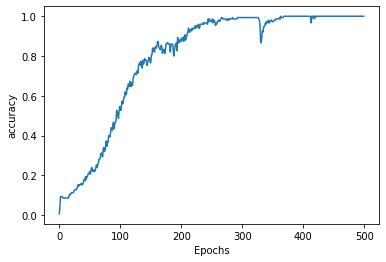

In [21]:
plot_metric(history, 'accuracy')

## Generate new text

In [40]:
seed_text = "It was a cold night."

# add number of words that we want to predict
num_next_words = 100

# run and loop to predict, and concatenate the words
for _ in range(num_next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')

  ##predict the class using the trained model
  probabilities = model.predict(token_list)
  predicted = np.argmax(probabilities, axis=-1)[0]

  if predicted !=0:
    #reference the predicted class with the vocabulary
    output_word = tokenizer.index_word[predicted]
    seed_text += " " + output_word

print(seed_text)

It was a cold night. the steam pouring from under her vivid hair impression that her whole head was on fire fire fire was bullied into taking some by percy percy percy percy a days drenched drenched to drenched splattered with mud with mud splattered with mud mud splattered with mud mud the splattered with mud mud mud mud splattered with mud the mud mud mud mud and size of splattered with mud mud mud mud splattered with and and garden students a returning to splattered with mud splattered with mud splattered with mud with mud the splattered with mud mud skin and mud mud
